<a href="https://colab.research.google.com/github/AilingLiu/Inferential_Statistics/blob/master/Categorical_Association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

# Categorical Association

## Chi-square

We would like to find the association between two categorical varianbes. In below example, we are an advertisement company that have collected data coming from three different groups: Student, Parent, and Corporate. We are interested to know which ad type interests which group, so we can invest corresponding ads in those groups. Below data shows votes from different audience groups on their favorite ads: Party, Child, Office. 

To be specific, we need to find out two things:
1.   Is the ad type has any association with audience group?
2.   If there's association, which audience is in favor of which ad type?

In [ ]:
data = pd.DataFrame(np.array([[12, 5, 6],[7, 15, 7],[5, 5, 14]]), columns=['Party', 'Child', 'Office'], index=['Student', 'Parent', 'Corporate'])
display(data)

,Party,Child,Office
Student,12,5,6
Parent,7,15,7
Corporate,5,5,14


We can conduct chi-square test to test the association between two categorical variables using scipy modules.

In [ ]:
from scipy.stats import chi2_contingency

c_stat, pval, df, expected_val = chi2_contingency(data)
expected_val = expected_val.round(1)

print('Expected Value if these two categorical varianbles are not related:')
display(expected_val)

print('Calculated P value: {}'.format(pval))

Expected Value if these two categorical varianbles are not related:


array([[ 7.3,  7.6,  8.2],
       [ 9.2,  9.5, 10.3],
       [ 7.6,  7.9,  8.5]])

Calculated P value: 0.005408290803578588


Here we can see that the expected values are far off from the observed data. Moreover, there are only 0.5% chance to observe such data if audience group has nothing to do with advertisement type. Hene, we rejected the null hypothesis in favor of the alternative hypothesis, i.e. the audience group has preference on their ad type. 

But how strong is this association? We can use Cramer's V to check its strength, where 0 means no association, and 1 is perfect. 

In [ ]:
n=data.sum().sum() #the total number of observation
m=min(data.shape)-1 #either the number of rows or columns whichever the smallest - 1
cramerV=np.sqrt(c_stat/(n*m))
print(cramerV)

0.3107928316933293


Cramers V is about 0.31, which is pretty modest.

Interpretation of Cramer's V from Research Gate.
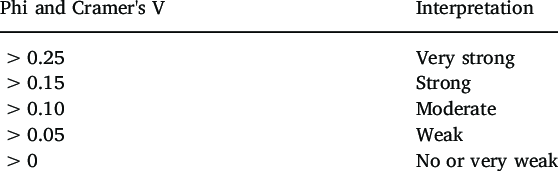

But which ads is preferred or least preferred by each audience group? We can use standard residusals to see where there is the most deviation from the expected values.

To standardise our residuals we need to divide each residual value by its standard error. We can directly get this value by using statsmodel api.

In [ ]:
import statsmodels.api as sm
# need to make a contingency table format
table = sm.stats.Table(data)

#standardized residuals
table.standardized_resids

,Party,Child,Office
Student,2.544487,-1.363592,-1.132685
Parent,-1.096214,2.744428,-1.629494
Corporate,-1.369141,-1.520432,2.822363


From this you can see that the biggest values are for the student + party cell, parent + child cell and the corporate + office cell.

## Chi-square goodness of fit

Your null hypothesis is that 60% of college students go to parties regularly, 30% go occaisionally and 10% never go. You want to test if your observed data matched this proportions. The solution of this question will be very similar to the above question. The difference will be you will need to calculate the expected counts based on the expected proportions listed in null hypothesis.

In [ ]:
exp_p=np.array([0.6, 0.3, 0.1]) #expected proportions
exp_count=data.loc['Student'].sum()*exp_p
display(pd.DataFrame([exp_count, data.loc['Student']], index=['expected', 'observed'], columns=data.columns))


,Party,Child,Office
expected,13.8,6.9,2.3
observed,12.0,5.0,6.0


We can see that `Office` group deviates the most from expected values. We will be using [chisqure](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html) to get test statistic and p value.

In [ ]:
from scipy.stats import chisquare
c_stat, pval = chisquare(data.loc['Student'], f_exp=exp_count)
print(f'chi square: {c_stat:.4f}\n p value: {pval:.4f}')

chi square: 6.7101
 p value: 0.0349


As the calculated p value is smaller than 0.05 significance level, we rejected the null hypothesis. It means college students in our sample differed from the expected distribution.

## Fisher's Exact Test

One of the assumption for chi-squre test is the minimum count in each cell is 5. When this assumption is not met, we can use Fisher's Exact Test to check two categorical variables' association.

Fisher's exact test compares the observed values to a probability distribution. We find this comparison distribution by examining all possible rearrangements of our table. The restrictions are that the marginal frequencies must be the same.

> Example
<br>You had expected that parents would like the ad with a child in it because you thought that people with children like children more.
To investigate this further, you took a sample of 15 adults, asked them whether or not they have children, and whether or not they like children. The results are saved in your console as a 2x2 table named child.

We can perform Fisher's exact test using the function [fisher_exact](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html).

> Null Hpothesis:
<br> $H_0$: The two variables are independent.

In [ ]:
child = pd.DataFrame(np.array([[7, 10], [1, 9]]), columns=['like', 'dislike'], index=['children', 'nochildren'])
display(child)

,like,dislike
children,7,10
nochildren,1,9


In [ ]:
from scipy.stats import fisher_exact
odds_ratio, pval = fisher_exact(child, alternative='two-sided')
print(f'Odds ratio: {odds_ratio:.4f}\n p value: {pval:.4f}')

Odds ratio: 6.3000
 p value: 0.1895


The probability that we would observe this or an even more imbalanced ratio by chance is about 18.95%. Using significance level at 5%, we cannot conclude that our observed imbalance is statistically significant; 
there is probably not an association between having children and liking them.